## [Open original folder](https://drive.google.com/drive/folders/1ymvxE_hhI9ZShoLKDO8El6pHUMcWhwQM?usp=sharing) ##


## Classification using CNNs ##

### Preparing Libraries ###

In [ ]:
import tensorflow
import keras
tensorflow.test.gpu_device_name()

# if the GPU works OK, it should print something like:
# /device:GPU:0

'/device:GPU:0'

In [ ]:
print(tensorflow.__version__)
print(keras.__version__)

2.3.0
2.4.3


### Load Dataset ###

In [ ]:
!wget --no-check-certificate \
    -r 'https://docs.google.com/uc?export=download&id=1ee0K4_19SK5PCxgqV0Qx05oof4bFRNAX' \
    -O /tmp/dataset-cats-dogs.zip

will be placed in the single file you specified.

--2020-08-22 22:20:05--  https://docs.google.com/uc?export=download&id=1ee0K4_19SK5PCxgqV0Qx05oof4bFRNAX
Resolving docs.google.com (docs.google.com)... 108.177.127.102, 108.177.127.100, 108.177.127.138, ...
Connecting to docs.google.com (docs.google.com)|108.177.127.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/tmp/dataset-cats-dogs.zip’

/tmp/dataset-cats-d     [ <=>                ]   3.18K  --.-KB/s    in 0s      

2020-08-22 22:20:05 (22.6 MB/s) - ‘/tmp/dataset-cats-dogs.zip’ saved [3257]

Loading robots.txt; please ignore errors.
--2020-08-22 22:20:05--  https://docs.google.com/robots.txt
Reusing existing connection to docs.google.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘/tmp/dataset-cats-dogs.zip’

/tmp/dataset-cats-d     [ <=>                ]     567  --.-KB/s    in 0s      

2020-08-22 22:20:05 (93.0 

In [ ]:
import os
import zipfile

local_zip = '/tmp/dataset-cats-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/dataset-cats-dogs'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')

# Directory with our test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')

### Explore the data ###

In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.950.jpg', 'cat.670.jpg', 'cat.661.jpg', 'cat.514.jpg', 'cat.567.jpg', 'cat.965.jpg', 'cat.107.jpg', 'cat.571.jpg', 'cat.738.jpg', 'cat.756.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total testing cat images:', len(os.listdir(test_cats_dir)))
print('total testing dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total testing cat images: 500
total testing dog images: 500


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

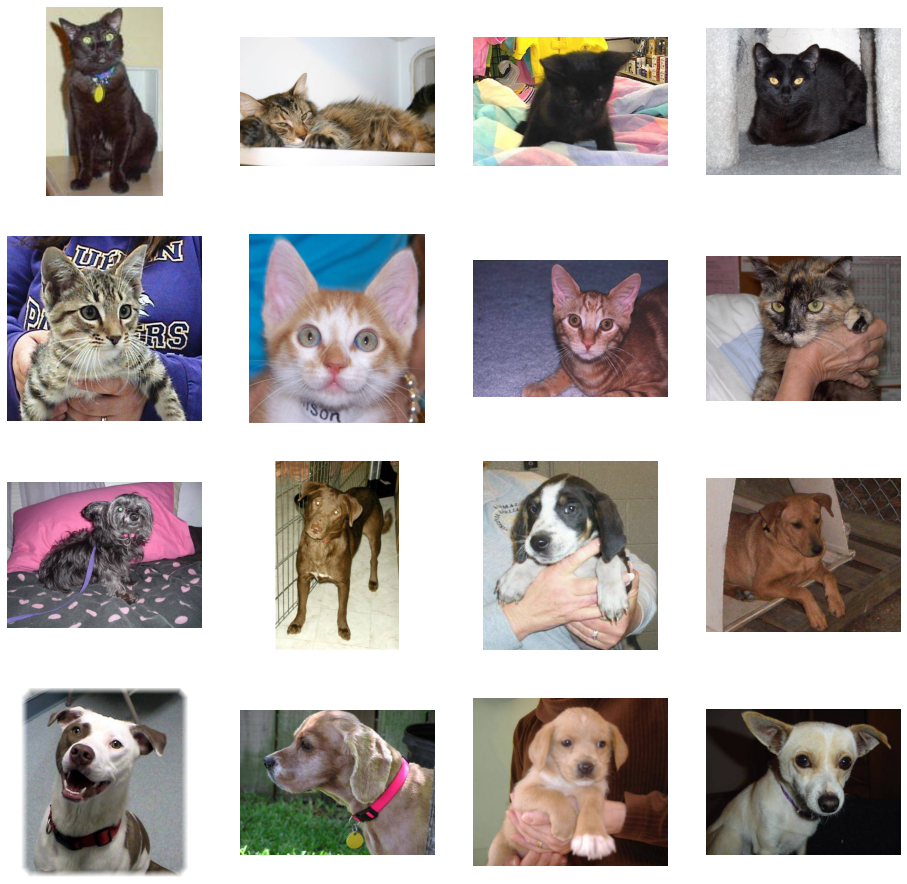

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### Build the model ###

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Nuestro mapa de características de entrada es de 150x150x3: 150x150 para los píxeles de la imagen, y 3 para
# los tres canales de color: R, G y B
img_input = layers.Input(shape=(150, 150, 3))

# La primera convolución extrae 16 filtros que son 3x3
# La convolución es seguida por una capa de max-pooling con una ventana de 2x2
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# La segunda convolución extrae 32 filtros que son 3x3
# La convolución es seguida por una capa de max-pooling con una ventana de 2x2
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# La tercera convolución extrae 64 filtros que son 3x3
# La convolución es seguida por una capa de max-pooling con una ventana de 2x2
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [ ]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)       

### Compile the model ###

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

### Preprocess the data ###

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Train the model ###

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint('weights.hdf5', monitor='loss',verbose=1, save_best_only=True)

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=test_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2,
      callbacks=[model_checkpoint])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15

Epoch 00001: loss improved from inf to 0.90650, saving model to weights.hdf5
100/100 - 9s - loss: 0.9065 - acc: 0.5700 - val_loss: 0.6491 - val_acc: 0.6810
Epoch 2/15

Epoch 00002: loss improved from 0.90650 to 0.62232, saving model to weights.hdf5
100/100 - 9s - loss: 0.6223 - acc: 0.6755 - val_loss: 0.6009 - val_acc: 0.6770
Epoch 3/15

Epoch 00003: loss improved from 0.62232 to 0.52638, saving model to weights.hdf5
100/100 - 9s - loss: 0.5264 - acc: 0.7440 - val_loss: 0.5906 - val_acc: 0.6760
Epoch 4/15

Epoch 00004: loss improved from 0.52638 to 0.44737, saving model to weights.hdf5
100/100 - 9s - loss: 0.4474 - acc: 0.7930 - val_loss: 0.5881 - val_acc: 0.7100
Epoch 5/15

Epoch 00005: loss improved from 0.44737 to 0.37677, saving model to weights.hdf5
100/100 - 9s - loss: 0.3768 - acc: 0.8310 - val_loss: 0.5968 - val_acc: 0.7110
Epoch 6/15

Epoch 00006: loss improved from 0.37677 to 0.28893, savi

### Examining the inner layers ###

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


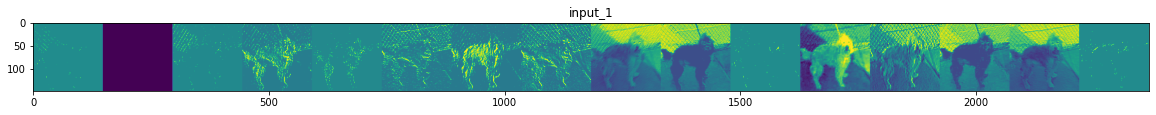

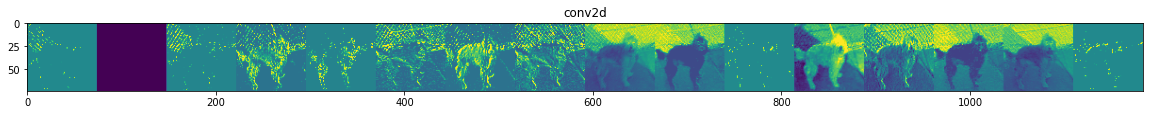

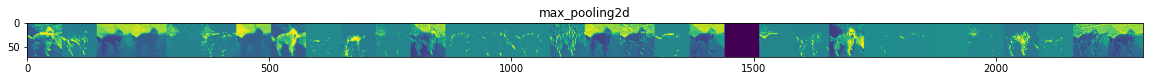

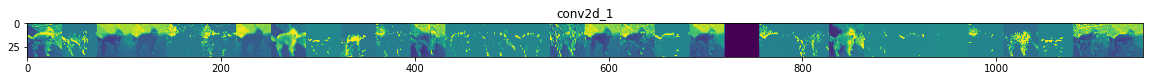

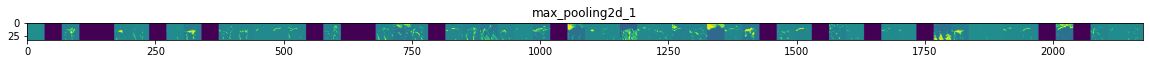

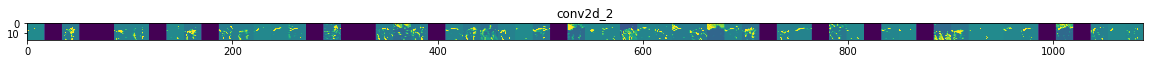

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

### Performance of training over time ###

Text(0.5, 1.0, 'Training and validation loss')

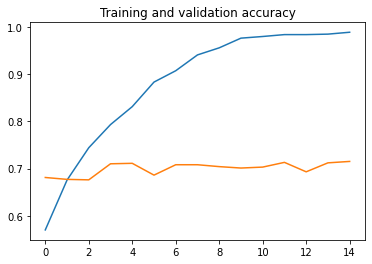

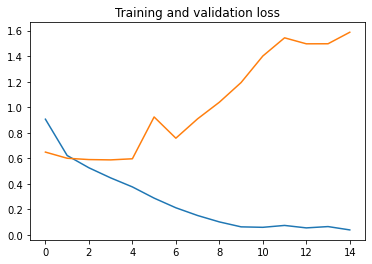

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

### Make predictions ###

Predicted:
CAT


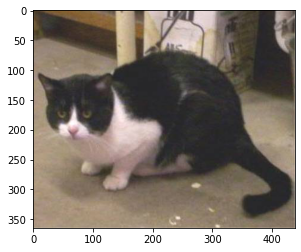

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

image_ = '/tmp/dataset-cats-dogs/test/cats/cat.2048.jpg'

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(150, 150))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 150, 150, 3)
	# center pixel data
	img = img.astype('float32')
	img = img
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image(image_)
	# load model
	model.load_weights('weights.hdf5')
	# predict the class
	result = model.predict(img)
  
	print("Predicted:")
	
	if int(result[0][0])==0:
		print("CAT")
	if int(result[0][0])==1:
		print("DOG")
    
 
# entry point, run the example
run_example()

img = mpimg.imread(image_)
imgplot = plt.imshow(img)